### 1. Create the baseline

In [3]:
import spacy

class autoner():
    def __init__():
        pass
    def dataset():
        pass
    def train():
        nlp = spacy.load("en_core_web_lg")

        from spacy.tokens import DocBin
        from tqdm import tqdm

        nlp = spacy.blank("en") # load a new spacy model
        doc_bin = DocBin()

        

    def infer():
        pass

In [1]:
import pandas as pd
data_path = "/media/bokey/HDD_internal_500G1/open_source_projects/sapeint NER/ner dataset/data/ner_dataset.csv"
df = pd.read_csv(data_path, encoding="latin-1")
df.loc[:, "Sentence #"] = df["Sentence #"].fillna(method="ffill")

In [2]:
sentences = df.groupby("Sentence #")["Word"].apply(list).values
pos = df.groupby("Sentence #")["POS"].apply(list).values
tags = df.groupby("Sentence #")["Tag"].apply(list).values

In [3]:
sentences

array([list(['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']),
       list(['Iranian', 'officials', 'say', 'they', 'expect', 'to', 'get', 'access', 'to', 'sealed', 'sensitive', 'parts', 'of', 'the', 'plant', 'Wednesday', ',', 'after', 'an', 'IAEA', 'surveillance', 'system', 'begins', 'functioning', '.']),
       list(['Helicopter', 'gunships', 'Saturday', 'pounded', 'militant', 'hideouts', 'in', 'the', 'Orakzai', 'tribal', 'region', ',', 'where', 'many', 'Taliban', 'militants', 'are', 'believed', 'to', 'have', 'fled', 'to', 'avoid', 'an', 'earlier', 'military', 'offensive', 'in', 'nearby', 'South', 'Waziristan', '.']),
       ...,
       list(['Following', 'Iran', "'s", 'disputed', 'June', '12', 'elections', ',', 'rights', 'groups', 'said', 'hundreds', 'of', 'people', 'were', 'detained', 'in', 'clashes', 'with', 'secur

In [4]:
tags

array([list(['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']),
       list(['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']),
       ...,
       list(['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'B-org', 'I-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'I-tim', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])],
      dtype=object)

In [59]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and testing sets
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences, tag, test_size=0.2, random_state=42)
val_sentences, test_sentences, val_tags, test_tags = train_test_split(test_sentences, test_tags, test_size=0.5, random_state=42)


In [68]:
from spacy.tokens import Doc
import spacy
import random
from spacy.training.example import Example
from sklearn.model_selection import train_test_split

# Split data into training, validation, and testing sets
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences, tag, test_size=0.2, random_state=42)
val_sentences, test_sentences, val_tags, test_tags = train_test_split(test_sentences, test_tags, test_size=0.5, random_state=42)

# Create a blank English model
nlp = spacy.blank("en")

# Add the NER component to the pipeline
ner = nlp.add_pipe("ner")

# Add entity labels to the ner component
for label in set(tag for tag_list in train_tags for tag in tag_list):
    ner.add_label(label)

# Define a function to convert data to spaCy format
def create_spacy_examples(sentences, tags):
    examples = []
    for sent, tag in zip(sentences, tags):
        doc = nlp.make_doc(" ".join(sent))
        example = Example.from_dict(doc, {"entities": tag})
        examples.append(example)
    return examples

# Create spaCy examples for training, validation, and testing
train_examples = create_spacy_examples(train_sentences, train_tags)
val_examples = create_spacy_examples(val_sentences, val_tags)
test_examples = create_spacy_examples(test_sentences, test_tags)

# Save examples in DocBin format
def save_examples_to_docbin(examples, output_path):
    doc_bin = DocBin(docs=[ex.reference for ex in examples])
    doc_bin.to_disk(output_path)

save_examples_to_docbin(train_examples, "train.spacy")
save_examples_to_docbin(val_examples, "val.spacy")
save_examples_to_docbin(test_examples, "test.spacy")

In [18]:
from spacy.tokens import Doc
import spacy
import random
from spacy.training.example import Example
from sklearn.model_selection import train_test_split
from tqdm import tqdm
# Split data into training, validation, and testing sets
train_sentences, val_sentences, train_tags, val_tags = train_test_split(sentences, tag, test_size=0.2, random_state=42)

# Define hyperparameters for training
learning_rate = 0.001
n_iter = 3
dropout = 0.5

# Experiment with different spaCy models
model_names = ["en_core_web_sm", "en_core_web_md", "en_core_web_lg"]

for model_name in model_names:
    print(f"Experimenting with model: {model_name}")
    
    # Load the pre-trained model
    nlp = spacy.load(model_name)
    print("model loaded", model_name)
    # Add or modify the NER component in the pipeline
    if "ner" not in nlp.pipe_names:
        ner = nlp.add_pipe("ner")
    else:
        ner = nlp.get_pipe("ner")
    print("ner pipeline ready")

    # Add entity labels to the ner component
    for label in set(tag for tag_list in tags for tag in tag_list):
        ner.add_label(label)
    print("labels ready for training")

    # Define a function to convert data to spaCy format
    def create_spacy_examples(sentences, tags):
        examples = []
        for sent, tag in zip(sentences, tags):
            doc = nlp.make_doc(" ".join(sent))
            example = Example.from_dict(doc, {"entities": tag})
            examples.append(example)
        return examples

    # Create spaCy examples for training
    train_examples = create_spacy_examples(train_sentences, train_tags)
    val_examples = create_spacy_examples(val_sentences, val_tags)
    print("data ready")

    # Train the NER model using the defined hyperparameters
    for _ in range(n_iter):
        print("iteration:", _)
        random.shuffle(train_examples)
        losses = {}
        for batch in tqdm(spacy.util.minibatch(train_examples, size=8), total= len(train_examples)/8):
            nlp.update(batch, drop=dropout, losses=losses)
            # print("batch", i)
        print(losses)

    # Evaluate the model on the validation set
    scorer = nlp.evaluate(val_examples)
    print(scorer.scores)
    break

Experimenting with model: en_core_web_sm
model loaded en_core_web_sm
ner pipeline ready
labels ready for training
data ready
iteration: 0


100%|█████████▉| 4795/4795.875 [02:51<00:00, 28.20it/s]/home/bokey/anaconda3/envs/auto_ner/lib/python3.10/site-packages/tqdm/std.py:639: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 4796/4795.875 [02:51<00:00, 27.95it/s]


{'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 236.5161718010049}
iteration: 1


100%|██████████| 4796/4795.875 [02:52<00:00, 27.74it/s]


{'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 9.509120102423166e-07}
iteration: 2


100%|██████████| 4796/4795.875 [02:51<00:00, 28.02it/s]


{'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 8.182556816701723e-09}


AttributeError: 'dict' object has no attribute 'scores'

In [4]:
import spacy
import random
from spacy.training.example import Example
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming you have the 'sentences' and 'tags' lists

# Split data into training, validation, and test sets
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences, tags, test_size=0.2, random_state=42)
train_sentences, val_sentences, train_tags, val_tags = train_test_split(train_sentences, train_tags, test_size=0.2, random_state=42)

# Define hyperparameters for training
learning_rate = 0.0001
n_iter = 10
dropout = 0.5

# Experiment with different spaCy models
model_names = ["en_core_web_sm", "en_core_web_md", "en_core_web_lg"]

# Lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model_name in model_names:
    print(f"Experimenting with model: {model_name}")
    
    # Load the pre-trained model
    nlp = spacy.load(model_name)

    # Add or modify the NER component in the pipeline
    if "ner" not in nlp.pipe_names:
        ner = nlp.add_pipe("ner")
    else:
        ner = nlp.get_pipe("ner")

    # Add entity labels to the ner component
    for label in set(tag for tag_list in tags for tag in tag_list):
        ner.add_label(label)

    # Create spaCy examples for training
    train_examples = [Example.from_dict(nlp.make_doc(" ".join(sent)), {"entities": tag}) for sent, tag in zip(train_sentences, train_tags)]
    val_examples = [Example.from_dict(nlp.make_doc(" ".join(sent)), {"entities": tag}) for sent, tag in zip(val_sentences, val_tags)]
    test_examples = [Example.from_dict(nlp.make_doc(" ".join(sent)), {"entities": tag}) for sent, tag in zip(test_sentences, test_tags)]

    # Lists to store learning curve data
    train_losses = []
    val_EVAL_scores = []

    # Train the NER model
    for epoch in range(n_iter):
        print("iteration:", epoch)
        random.shuffle(train_examples)
        losses = {}
        for batch in tqdm(spacy.util.minibatch(train_examples, size=8), total = len(train_examples)/8):
            nlp.update(batch, drop=dropout, losses=losses)
        train_losses.append(losses["ner"])

        # Evaluate the model on the validation set
        with nlp.disable_pipes("ner"):
            val_EVAL = nlp.evaluate(val_examples)
            val_EVAL_scores.append(val_EVAL)

    # Calculate evaluation metrics
    y_true = []
    y_pred = []
    for example in val_examples:
        doc = example.reference
        gold_entities = [(ent.start, ent.end, ent.label_) for ent in doc.ents]
        y_true.extend(gold_entities)
        pred_entities = [(ent.start, ent.end, ent.label_) for ent in nlp(doc.text).ents]
        y_pred.extend(pred_entities)
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    accuracy = accuracy_score(y_true[:, 2], y_pred[:, 2])
    precision = precision_score(y_true[:, 2], y_pred[:, 2], average="weighted")
    recall = recall_score(y_true[:, 2], y_pred[:, 2], average="weighted")
    f1 = f1_score(y_true[:, 2], y_pred[:, 2], average="weighted")

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Plot learning curve
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(range(n_iter), train_losses, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Learning Curve for Model: {model_name}")
    plt.legend()

    # Plot F1-score curve
    plt.subplot(1, 3, 2)
    plt.plot(range(n_iter), val_f1_scores, label="Validation F1-score")
    plt.xlabel("Epoch")
    plt.ylabel("F1-score")
    plt.title(f"F1-score Curve for Model: {model_name}")
    plt.legend()

    # Create Confusion Matrix
    plt.subplot(1, 3, 3)
    labels = ['B-geo', 'I-geo', 'B-org', 'I-org', 'B-gpe', 'I-gpe', 'B-tim', 'I-tim']
    conf_mat = confusion_matrix(y_true[:, 2], y_pred[:, 2], labels=labels)
    plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels, rotation=45)
    plt.yticks(np.arange(len(labels)), labels)
    plt.tight_layout()

    plt.show()

# Print evaluation metrics
for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracy_scores, precision_scores, recall_scores, f1_scores):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()


Experimenting with model: en_core_web_sm
iteration: 0


100%|█████████▉| 3834/3836.625 [02:16<00:00, 27.27it/s]/home/bokey/anaconda3/envs/auto_ner/lib/python3.10/site-packages/tqdm/std.py:639: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 3837/3836.625 [02:16<00:00, 28.03it/s]


iteration: 1


100%|██████████| 3837/3836.625 [02:17<00:00, 27.97it/s]


iteration: 2


100%|██████████| 3837/3836.625 [02:17<00:00, 27.94it/s]


iteration: 3


100%|██████████| 3837/3836.625 [02:16<00:00, 28.14it/s]


iteration: 4


100%|██████████| 3837/3836.625 [02:17<00:00, 27.88it/s]


iteration: 5


100%|██████████| 3837/3836.625 [02:16<00:00, 28.05it/s]


iteration: 6


100%|██████████| 3837/3836.625 [02:17<00:00, 27.86it/s]


iteration: 7


100%|██████████| 3837/3836.625 [02:18<00:00, 27.79it/s]


iteration: 8


100%|██████████| 3837/3836.625 [02:18<00:00, 27.80it/s]


iteration: 9


100%|██████████| 3837/3836.625 [02:17<00:00, 27.97it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [34]:
train_tags

array([list(['B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'B-org', 'I-org', 'I-org', 'O', 'O']),
       list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O']),
       ...,
       list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
       list(['O', 'O', 'B-org', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O']),
       list(['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])],
      dtype=object)

In [30]:
doc = nlp("Adam sander moved to London")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

print(doc)

Adam sander moved to London


/home/bokey/anaconda3/envs/auto_ner/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/bokey/anaconda3/envs/auto_ner/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


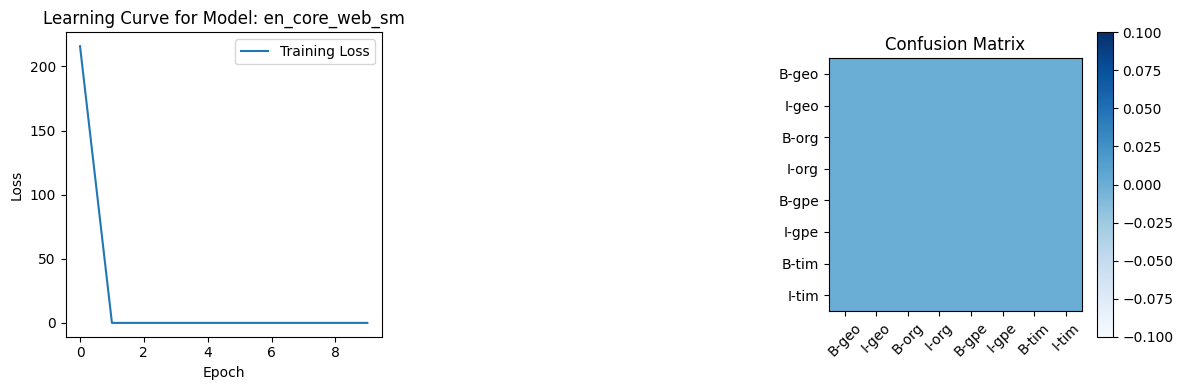

Model: en_core_web_sm
Accuracy: nan
Precision: nan
Recall: nan
F1-Score: nan

Model: en_core_web_md
Accuracy: nan
Precision: nan
Recall: nan
F1-Score: nan

Model: en_core_web_lg
Accuracy: nan
Precision: nan
Recall: nan
F1-Score: nan



In [26]:
# Calculate evaluation metrics
y_true = []
y_pred = []
for example in val_examples:
    doc = example.reference
    gold_entities = [(ent.start, ent.end, ent.label_) for ent in doc.ents]
    y_true.extend(gold_entities)
    pred_entities = [(ent.start, ent.end, ent.label_) for ent in nlp(doc.text).ents]
    y_pred.extend(pred_entities)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

# Append scores to lists
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)

# Plot learning curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(range(n_iter), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Learning Curve for Model: {model_name}")
plt.legend()

# # Plot F1-score curve
# plt.subplot(1, 3, 2)
# plt.plot(range(n_iter), val_EVAL_scores, label="Validation F1-score")
# plt.xlabel("Epoch")
# plt.ylabel("F1-score")
# plt.title(f"F1-score Curve for Model: {model_name}")
# plt.legend()

# Create Confusion Matrix
plt.subplot(1, 3, 3)
labels = ['B-geo', 'I-geo', 'B-org', 'I-org', 'B-gpe', 'I-gpe', 'B-tim', 'I-tim']
conf_mat = confusion_matrix(y_true, y_pred, labels=labels)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.tight_layout()

plt.show()

# Print evaluation metrics
for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracy_scores, precision_scores, recall_scores, f1_scores):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

In [9]:
import spacy
import random
from spacy.training.example import Example
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming you have the 'sentences' and 'tags' lists

# Split data into training, validation, and test sets
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences, tags, test_size=0.2, random_state=42)
train_sentences, val_sentences, train_tags, val_tags = train_test_split(train_sentences, train_tags, test_size=0.2, random_state=42)

# Define hyperparameters for training
learning_rate = 0.001
n_iter = 10
dropout = 0.5

# Experiment with different spaCy models
model_names = ["en_core_web_sm", "en_core_web_md", "en_core_web_lg"]

# Lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

def convert_to_spacy_format(sentences, tags):
    examples = []
    for sent, tag_list in zip(sentences, tags):
        doc = nlp.make_doc(" ".join(sent))
        entities = []
        for tag in tag_list:
            label = tag
            start = 0
            end = 0
            entities.append((start, end, label))
        example = Example.from_dict(doc, {"entities": entities})
        examples.append(example)
    return examples

for model_name in model_names:
    print(f"Experimenting with model: {model_name}")
    
    # Load the pre-trained model
    nlp = spacy.load(model_name)

    # Add or modify the NER component in the pipeline
    if "ner" not in nlp.pipe_names:
        ner = nlp.add_pipe("ner")
    else:
        ner = nlp.get_pipe("ner")

    # Add entity labels to the ner component
    for label in set(tag for tag_list in tags for tag in tag_list):
        ner.add_label(label)

    # Create spaCy examples for training
    train_examples = convert_to_spacy_format(train_sentences, train_tags)
    val_examples = convert_to_spacy_format(val_sentences, val_tags)
    test_examples = convert_to_spacy_format(test_sentences, test_tags)

    # Lists to store learning curve data
    train_losses = []
    val_f1_scores = []

    # Train the NER model
    for epoch in range(n_iter):
        random.shuffle(train_examples)
        losses = {}
        for batch in tqdm(spacy.util.minibatch(train_examples, size=8), total = len(train_examples)/8):
            nlp.update(batch, drop=dropout, losses=losses)
        train_losses.append(losses["ner"])

        # # Evaluate the model on the validation set
        # with nlp.disable_pipes("ner"):
        #     val_f1 = nlp.evaluate(val_examples)["ents_f"]
        #     val_f1_scores.append(val_f1)

Experimenting with model: en_core_web_sm


100%|█████████▉| 3836/3836.625 [02:17<00:00, 28.28it/s]/home/bokey/anaconda3/envs/auto_ner/lib/python3.10/site-packages/tqdm/std.py:639: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 3837/3836.625 [02:17<00:00, 27.98it/s]


KeyError: 'ents_f'

In [14]:
nlp("I went to london").ents

()

In [45]:
# Calculate evaluation metrics
y_true = []
y_pred = []
for example in val_examples:
    doc = example.reference
    gold_entities = [(ent.start, ent.end, ent.label_) for ent in doc.ents]
    y_true.extend(gold_entities)
    pred_entities = [(ent.start, ent.end, ent.label_) for ent in nlp(doc.text).ents]
    y_pred.extend(pred_entities)

In [55]:
# Calculate evaluation metrics
y_true = []
y_pred = []
for example in val_examples:
    doc = example.reference
    gold_entities = [(ent.start, ent.end, ent.label_) for ent in doc.ents]
    y_true.extend(gold_entities)
    pred_entities = nlp(doc.text).ents
    y_pred.extend([(ent.start, ent.end, ent.label_) for ent in pred_entities])



IndexError: string index out of range

In [19]:
for sent, tags in zip(val_sentences, val_tags):
    doc = nlp(" ".join(sent))
    y_true = tags
    pred_entities = [(ent.start, ent.end, ent.label_) for ent in doc.ents]
    y_pred.extend(pred_entities)

AttributeError: 'numpy.ndarray' object has no attribute 'extend'

2. Meet the Expectations
    Training Bert
        - pure reansformer 
        - sentense transformer 

In [47]:
nlp = spacy.load("en_core_web_sm")
print(nlp("The village of Treblinka is located in Poland").ents)

(Treblinka, Poland)


### 2.1. pure reansformer 

### 2.1. sentense transformer 

### 3. Exeed the expectations
    Few shot / Zero Shot NER